<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-of-packages" data-toc-modified-id="Load-of-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load of packages</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Inspect-data" data-toc-modified-id="Inspect-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Inspect data</a></span></li><li><span><a href="#Calculating-excess-market-return" data-toc-modified-id="Calculating-excess-market-return-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculating excess market return</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Calculating-the-variables-we-need" data-toc-modified-id="Calculating-the-variables-we-need-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Calculating the variables we need</a></span></li><li><span><a href="#Country-compairson-and-calculating-critical-upper-and-lower-values-for-outlier-definition" data-toc-modified-id="Country-compairson-and-calculating-critical-upper-and-lower-values-for-outlier-definition-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Country compairson and calculating critical upper and lower values for outlier definition</a></span><ul class="toc-item"><li><span><a href="#Creating-different-dictionaries-to-work-with" data-toc-modified-id="Creating-different-dictionaries-to-work-with-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Creating different dictionaries to work with</a></span><ul class="toc-item"><li><span><a href="#First-a-dictionary-that-contain-226-banks-wth-12-calculated-variables" data-toc-modified-id="First-a-dictionary-that-contain-226-banks-wth-12-calculated-variables-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>First a dictionary that contain 226 banks wth 12 calculated variables</a></span></li><li><span><a href="#Second-a-dictionary-containing-the-15-countries-where-the-mean-values-from-the-banks-in-a-specific-country-is-in-one-dataframe" data-toc-modified-id="Second-a-dictionary-containing-the-15-countries-where-the-mean-values-from-the-banks-in-a-specific-country-is-in-one-dataframe-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Second a dictionary containing the 15 countries where the mean values from the banks in a specific country is in one dataframe</a></span></li></ul></li></ul></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Outliers</a></span><ul class="toc-item"><li><span><a href="#Examples-boxplot---all-data" data-toc-modified-id="Examples-boxplot---all-data-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Examples boxplot - all data</a></span></li><li><span><a href="#Winsorizing-outliers" data-toc-modified-id="Winsorizing-outliers-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Winsorizing outliers</a></span></li></ul></li></ul></div>

### Load of packages

In [1]:
%load_ext autoreload
%autoreload 2

"""
Load relevant packages 
"""

import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick
from matplotlib import animation, cm
from scipy import stats
import pandas_datareader as pdr
import datetime
import seaborn as sns
import matplotlib.ticker as ticker
import datetime
from scipy.stats import chi2
import pickle
from scipy import optimize
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import gmean

from typing import Union, List

### Functions

In [2]:
"""
Function for geometric mean
"""
def geomean(data):
    
    n = data.shape[0]
    
    
    return (data+1).prod()**(1/n)-1

In [3]:
"""
A function that removes outliers
"""

def outlier_remove(data,datatype):
    
    """
    datatype = 1 is Excess return
    datatype = 2 is Equity ratio, Tier 1 ratio, Equity/RWA, Leverage ratio & Tier 1/RWA
    """
    
    if datatype == 1: #sets the critical values for excess returns
        outlier_low = c1
        outlier_high = c2
    else:    #sets the critical values for ratios
        outlier_low = 0
        outlier_high = 1
    
    #mask outlier 
    mask_high = data >= outlier_high
    mask_low = data <= outlier_low
    
    #winsorize outliers
    if datatype == 1:
        data[mask_high] = outlier_high
        data[mask_low] = outlier_low
    else:
        data[mask_high] = np.nan
        data[mask_low] = np.nan
        
    return data

### Load data

In [4]:
"""
Import risk free rate
"""
df_rf = pd.DataFrame(pd.read_excel("/Users/julielaustsen/Desktop/OneDrive/UNI/Speciale /Data/Risk free rate/euriobor-ready_to_python.xlsx", index_col=0, header=1,sheet_name='to python') )
df_rf = df_rf.drop(columns=['Unnamed: 2'])
df_rf.head()

,euribor 1-month (Y)
Date,
1999-01-24,0.002632
1999-02-24,0.002605
1999-03-24,0.002546
1999-04-24,0.002246
1999-05-24,0.002138


In [5]:
"""
Import market data
"""

df_mkt = pd.DataFrame(pd.read_excel("/Users/julielaustsen/Desktop/OneDrive/UNI/Speciale /Data/Market data/market data to python.xlsx", index_col=0, header=1,sheet_name='to python') )
df_mkt.head()

,EUROPE IMI (price),EUROPE IMI (return)
Date,,
1999-01-24,702.872,0.000000
1999-02-24,710.217,0.010450
1999-03-24,727.125,0.023807
1999-04-24,764.111,0.050866
1999-05-24,742.658,-0.028076


In [6]:
"""
Import bank data 
"""
path = "/Users/julielaustsen/Desktop/OneDrive/UNI/Speciale /Data/Eikon" #Set path
os.chdir(path) 

#import data    
df = pd.read_excel('Eikon_data_to_python.xlsx', index_col=0)

In [7]:
"""
Create dictionary with the banks as keys
"""
#list with banks' name
no_banks = np.int32(df.shape[1]/15) #Antal banker
banks_names = [] #empty array
for i in np.arange(no_banks):
    banks_names.append(df.columns[i*15].split(' - MARKET',1)[0]) #Split the name from first variabel
    
#dictionary with all banks
data = {}
for index, value in enumerate(banks_names): #enumerate gives the index and thee value
    data[value] = df.iloc[:,index*15:index*15+15]


### Inspect data

In [8]:
"""
Control numbers of banks and keys
We want to be sure that all three numbers are the same. We want all bank names to be a key
"""
print(len(banks_names))
print(len(data.keys()))
print(no_banks)


234
234
234


In [45]:
"""
Count of unique bank names. It list the banks that are mentioned more than 1 time
The dictionary will always take the last observation in the dataset. 
"""
compa = {i:banks_names.count(i) for i in banks_names}
for i in compa:
    if compa[i] > 1:
        print(i)

### Calculating excess market return

In [15]:
"""
Calculating excess return
"""

excess_mkt= df_mkt['EUROPE IMI (return)'] - df_rf['euribor 1-month (Y)']
df_mkt.insert(2, 'EUROPE IM (excess)', excess_mkt) #Adding the excess market return to the existing dataframe

In [17]:
df_mkt.describe()

,EUROPE IMI (return),EUROPE IM (excess)
count,276.000000,276.000000
mean,0.003046,0.001843
std,0.044026,0.044308
min,-0.155151,-0.154753
25%,-0.019579,-0.021577
50%,0.010406,0.009455
75%,0.029056,0.028387
max,0.140296,0.140157


### Data cleaning
Only the matching of the two variables 'market value' and 'price' is performed in python. The rest of the data cleaning is done in excel before uploading the file to python

In [18]:
"""
We want the same amount of observations for market capitalization and price, so when we are calculating returns
we are able to do value weighted portfolios. We therefore create a new dictionary where a market value and price
both got the value nan if one of the variable is missing. 
"""
data_nan = {} #create a new empty dictionary
for i in data.keys():
    data_nan[i] = data[i]
    data_nan[i].loc[data_nan[i].iloc[:,:2].isnull().any(axis=1), :] = np.nan #we replace with the value nan, if a observation is missing mkt cap or price

In [19]:
"""
Now we want to remove any banks that might have all values = nan. We create a new dictionary where these are removed
"""
data_nan_re = data_nan.copy() 
for i in data_nan.keys():
    if np.int32(data_nan_re[i].isna().sum().mean()) == data_nan_re[i].shape[0]: #remove the bank/key if the mean of nan is = shape of the dataframe
        del data_nan_re[i]

In [20]:
"""
We see that we have removed 8 banks/keys
"""
print(len(data_nan_re.keys()))
print(len(data_nan.keys()))

226
234


### Calculating the variables we need

In [21]:
"""
Dimension of our cleaned data
"""
dim_1 = data_nan_re[list(data_nan_re.keys())[0]].shape[0]
dim_2 = data_nan_re[list(data_nan_re.keys())[0]].shape[1]
dim_3 = len(data_nan_re.keys())

In [22]:
"""
Creating a dictionary with the variables we need for calculations
"""
data_calc = {}
for i in data_nan_re.keys():
    data_calc[i] = pd.DataFrame(data_nan_re[i].iloc[:,0])
    ret = data_nan_re[i].iloc[:,1].diff()/data_nan_re[i].iloc[1:,1]
    data_calc[i]['Return'] = ret
    data_calc[i]['Excess Return'] = ret - df_rf['euribor 1-month (Y)'][1:]
    equ = data_nan_re[i].iloc[:,8]
    data_calc[i]['Book Equity'] = equ
    data_calc[i]['Book Leverage ratio'] = data_nan_re[i].iloc[:,9] / data_nan_re[i].iloc[:,6]
    data_calc[i]['Book Equity ratio'] = equ / data_nan_re[i].iloc[:,6]
    data_calc[i]['Book Equity/RWA'] = equ / data_nan_re[i].iloc[:,10]
    data_calc[i]['Tier 1 ratio'] = data_nan_re[i].iloc[:,13] / data_nan_re[i].iloc[:,6]
    data_calc[i]['Tier 1/RWA'] = data_nan_re[i].iloc[:,13] / data_nan_re[i].iloc[:,10]
    data_calc[i]['Total Assets'] = data_nan_re[i].iloc[:,6]
    data_calc[i]['Total Risk Weighted Assets'] = data_nan_re[i].iloc[:,10]

In [23]:
#Inspect data
data_calc[list(data_calc.keys())[4]].head()

,ING GROEP - MARKET VALUE,Return,Excess Return,Book Equity,Book Leverage ratio,Book Equity ratio,Book Equity/RWA,Tier 1 ratio,Tier 1/RWA,Total Assets,Total Risk Weighted Assets
Date,,,,,,,,,,,
1999-01-24,46862.05,NaN,NaN,35054000.0,0.9269,0.07113,NaN,NaN,NaN,492815000.0,NaN
1999-02-24,48487.55,0.028403,0.025798,35054000.0,0.9269,0.07113,NaN,NaN,NaN,492815000.0,NaN
1999-03-24,46882.20,-0.030272,-0.032818,35054000.0,0.9269,0.07113,NaN,NaN,NaN,492815000.0,NaN
1999-04-24,53126.84,0.117542,0.115297,35054000.0,0.9269,0.07113,NaN,NaN,NaN,492815000.0,NaN
1999-05-24,51329.14,-0.035024,-0.037162,35054000.0,0.9269,0.07113,NaN,NaN,NaN,492815000.0,NaN


### Country compairson and calculating critical upper and lower values for outlier definition

In [24]:
"""
Load of Country data
"""
df_con = pd.DataFrame(pd.read_excel("/Users/julielaustsen/Desktop/OneDrive/UNI/Speciale /Data/Eikon/Country dist.xlsx", index_col=None, header=0) )

,Bank,Country
0,HSBC HOLDINGS,UK
1,BNP PARIBAS,France
2,BANCO SANTANDER,Spain
3,INTESA SANPAOLO,Italy
4,ING GROEP,Netherlands


In [25]:
"""
Overview of the countries and how many banks there are represented
"""
df_con["Country"].value_counts()

Italy          37
Denmark        34
UK             25
Norway         23
Germany        21
Switzerland    17
Spain          16
France         15
Sweden         11
Portugal        9
Austria         7
Belgium         6
Netherlands     5
Finland         4
Ireland         4
Name: Country, dtype: int64

In [26]:
"""
We have removed some banks earlier beecause all their values was Nan. We have to remove them from our country overview 
"""
main_list2 = list(set(df_con["Bank"].unique()) - set(data_calc.keys()))
main_list2

['BRADFORD & BINGLEY (XET)',
 'DEN NORSKE BANK DEAD SEE 307532',
 "S E BANKEN 'A' (LON) DEAD - DELIST 29/04/98",
 'KBC BANKVERZEKERINGS(XSQ DEAD - DEAD 22/06/99',
 'SVENSKA HANDBK AF (LON) DEAD - DELIST 29/04/98',
 'TSB GROUP P/P',
 'BCA.PPO.DI SONDRIO (XET) DEAD - 30/05/11',
 'FORENINGSSPARBANKEN(LON) DEAD - DELIST 20/05/98']

In [27]:
"""
We drop the 8 banks again
"""
df_con_red = df_con.copy()
df_con_red = df_con_red.drop(200)
df_con_red = df_con_red.drop(205)
df_con_red = df_con_red.drop(212)
df_con_red = df_con_red.drop(209)
df_con_red = df_con_red.drop(220)
df_con_red = df_con_red.drop(218)
df_con_red = df_con_red.drop(216)
df_con_red = df_con_red.drop(228)

In [28]:
"""
Then we check again to make sure there are no differences 
"""
main_list3 = list(set(df_con_red["Bank"].unique()) - set(data_calc.keys()))
print(main_list3)

df_con_red["Country"].value_counts()

[]


Italy          36
Denmark        34
UK             23
Norway         22
Germany        21
Switzerland    17
Spain          16
France         15
Portugal        9
Sweden          8
Austria         7
Belgium         6
Netherlands     4
Finland         4
Ireland         4
Name: Country, dtype: int64

#### Creating different dictionaries to work with

##### First a dictionary that contain 226 banks wth 12 calculated variables

In [29]:
"""
Now we create a new dictionary with the 11 calculated variables as before. However we add one more variable 'Country'
"""

df_con_red.reset_index(inplace = True) #We need to reset the index of the dataframe after we removed the 8 banks

data_calc_con = data_calc.copy() #Copy of the calculated dictionary
cnt = -1 #to know which value in dataframe to assign to the dictionary's new variable
for i in data_calc.keys():
    cnt+=1
    data_calc_con[i]['Country'] = df_con_red["Country"][cnt]
    

##### Second a dictionary containing the 15 countries where the mean values from the banks in a specific country is in one dataframe

In [31]:
"""
We create a dictionary where countries are the keys and the values are the banks names
"""
dict_sort = {}
for i in df_con_red["Country"].unique():
    dict_sort[i] = []
    for j in data_calc_con.keys():
        if data_calc_con[j].Country.unique() == i:
            dict_sort[i].append(j)

In [32]:
"""
A dictionary with all the banks
"""
dict_sort['all'] = list(data_calc_con.keys())

In [33]:
"""
We set the first column (variable) in data_calc_con to be 'Market Value' so it is possible to aggregrate across banks 
"""
for i in data_calc_con.keys():
    data_calc_con[i].columns.values[0]='Market value'

In [34]:
"""
We create a dictionary for each country containing the 11 calculated variables
"""
dict_countries_calc = {}

for j in dict_sort.keys():
    dict_countries_calc[j] = pd.concat([data_calc_con[i] for i in dict_sort[j]]).groupby(level=0).mean()

In [35]:
"""
We create a dictionary for each country containing the 11 calculated variables where each bank is value within the country
"""
dict_countries_calc2 = {}

for j in dict_sort.keys():
    agg = pd.concat([data_calc_con[i] for i in dict_sort[j]]).groupby(level=0).agg({lambda x: x.sum (skipna=True)})
    
    for i in dict_sort[j]:
        data_calc_con[i]['weight'] = data_calc_con[i].iloc[:,0]/agg.iloc[:,0]
        data_calc_con[i]['VW_exret'] = data_calc_con[i]['Excess Return']*data_calc_con[i]['weight']
        
    dict_countries_calc2[j] = pd.concat([data_calc_con[i] for i in dict_sort[j]]).groupby(level=0).agg({lambda x: x.sum (skipna=True)})
    dict_countries_calc2[j].columns=['Market value','Return', 'Excess Return', 'Book Equity', 'Book Leverage ratio', 'Book Equity ratio','Book Equity/RWA','Tier 1 ratio','Tier 1/RWA','Total Assets','Total Risk Weighted Assets','Country','weight','VW_exret']
    

### Outliers

In [40]:
"""
Outliers we want out. 
Ratios:
- Leverage ratio here we want to remove the observations above 1 (extreme leverage case - near bankruptcy)
- Equity ratio here we want to remove the observations below 0 (extreme leverage case - near bankruptcy)
- Tier 1 ratio here we want to remove the observations below 0 (extreme leverage case - near bankruptcy)
- Equity/Risk weighted assets here we want to remove the observations below 0 (extreme leverage case - near bankruptcy)
- Tier 1/Risk weighted assets here we want to remove the observations below 0 (extreme leverage case - near bankruptcy)

For excess return we use the metholody 
* Lower boundary: 1%qth - 1.5*IQR
* Upper boundary: 99%qth + 1.5*IQR 
* IQR = Q3(75%)-Q1(25%)

Done on country level (value-weighted) and the values are weighted according to the numbers of banks in each country
"""

outlier_count = pd.DataFrame(columns=['No. observations'])

c1 = np.sum(out_calc['Lower bound']*out_calc['Weight'])
c2 = np.sum(out_calc['Upper bound']*out_calc['Weight'])
c3 = 0.0
c4 = 1.0

count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0


for i in data_calc.keys():
    count1 += (data_calc[i]['Excess Return'].values < c1).sum()
    count2 += (data_calc[i]['Excess Return'].values > c2).sum()
    count3 += (data_calc[i]['Book Leverage ratio'].values > c4).sum()
    count4 += (data_calc[i]['Book Equity ratio'].values < c3).sum()
    count5 += (data_calc[i]['Tier 1 ratio'].values < c3).sum()
    count6 += (data_calc[i]['Book Equity/RWA'].values < c3).sum()#to sort the negative equity values out
    count7 += (data_calc[i]['Tier 1/RWA'].values < c3).sum()#to sort the negative equity values out
    
outlier_count.loc['Excess return < '+round(c1,4).astype('str'),'No. observations']=count1
outlier_count.loc['Excess return > ' +round(c2,4).astype('str'),'No. observations']=count2
#outlier_count.loc['Leverage ratio > 1','No. observations']=count3
outlier_count.loc['Equity ratio < 0','No. observations']=count4
outlier_count.loc['Tier 1 ratio < 0','No. observations']=count5
#outlier_count.loc['Book Equity/RWA < 0','No. observations']=count6
outlier_count.loc['Tier 1/RWA < 0','No. observations']=count7

outlier_count

,No. observations
Excess return < -0.9072,70
Excess return > 0.5481,5
Equity ratio < 0,129
Tier 1 ratio < 0,12
Tier 1/RWA < 0,12


#### Examples boxplot - all data

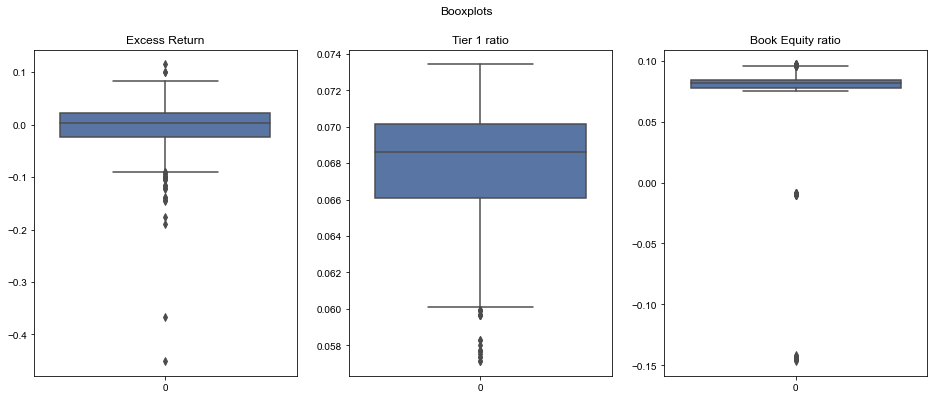

In [41]:
"""
Here we use the data all_countries. This is equal weight of all observation so it is quite baised
"""
ovall = pd.concat([data_calc[i] for i in dict_sort['all']]).groupby(level=0).mean()

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Booxplots')
sns.set_theme(style="whitegrid")
sns.boxplot(ax=axes[0], data=ovall['Excess Return']).set_title('Excess Return')
sns.boxplot(ax=axes[1], data=ovall['Tier 1 ratio']).set_title('Tier 1 ratio')
sns.boxplot(ax=axes[2], data=ovall['Book Equity ratio']).set_title('Book Equity ratio')
plt.show()

#### Winsorizing outliers

In [42]:
"""
Creating a dictionary with the variables we need for calculations 
"""
data_calc = {}
for i in data_nan_re.keys():
    data_calc[i] = pd.DataFrame(data_nan_re[i].iloc[:,0])
    ret = data_nan_re[i].iloc[:,1].diff()/data_nan_re[i].iloc[1:,1]
    data_calc[i]['Return'] = ret
    data_calc[i]['Excess Return'] = ret - df_rf['euribor 1-month (Y)'][1:]
    equ = data_nan_re[i].iloc[:,7] - data_nan_re[i].iloc[:,9]
    data_calc[i]['Book Equity'] = equ
    data_calc[i]['Book Leverage ratio'] = data_nan_re[i].iloc[:,9] / data_nan_re[i].iloc[:,6]
    data_calc[i]['Book Equity ratio'] = equ / data_nan_re[i].iloc[:,6]
    data_calc[i]['Book Equity/RWA'] = equ / data_nan_re[i].iloc[:,10]
    data_calc[i]['Tier 1 ratio'] = data_nan_re[i].iloc[:,13] / data_nan_re[i].iloc[:,6]
    data_calc[i]['Tier 1/RWA'] = data_nan_re[i].iloc[:,13] / data_nan_re[i].iloc[:,10]
    data_calc[i]['Total Assets'] = data_nan_re[i].iloc[:,6]
    data_calc[i]['Total Risk Weighted Assets'] = data_nan_re[i].iloc[:,10]

In [43]:
"""
Applying the outlier function so we get a new dictionary with the winsorized values
"""

data_calc_win = data_calc.copy()

for i in data_calc_win.keys():
    data_calc_win[i]['Excess Return'] = outlier_remove(data=data_calc_win[i]['Excess Return'], datatype=1)
    data_calc_win[i]['Book Leverage ratio'] = outlier_remove(data=data_calc_win[i]['Book Leverage ratio'], datatype=2)
    data_calc_win[i]['Book Equity ratio'] = outlier_remove(data=data_calc_win[i]['Book Equity ratio'], datatype=2)
    data_calc_win[i]['Tier 1 ratio'] = outlier_remove(data=data_calc_win[i]['Tier 1 ratio'], datatype=2)
    data_calc_win[i]['Book Equity/RWA'] = outlier_remove(data=data_calc_win[i]['Book Equity/RWA'], datatype=2)
    data_calc_win[i]['Tier 1/RWA'] = outlier_remove(data=data_calc_win[i]['Tier 1/RWA'], datatype=2)

In [44]:
"""
We save the dictionary in memory so we can call it in another notebook
"""

with open('data_calc_win', 'wb') as data_dict_win: #save bank data winsorized
   pickle.dump(data_calc_win, data_dict_win)

with open('df_mkt', 'wb') as data_market_df: #save market data
   pickle.dump(df_mkt, data_market_df)

with open('df_rf', 'wb') as data_riskfree_df: #save risk free data
   pickle.dump(df_rf, data_riskfree_df)

with open('data_calc', 'wb') as data_dict_calc: #save bank data
   pickle.dump(data_calc, data_dict_calc)

with open('dict_sort', 'wb') as data_sort_list: #save bank data
   pickle.dump(dict_sort, data_sort_list)

with open('data_nan_re', 'wb') as data_nan: #save bank data
   pickle.dump(data_nan_re, data_nan)

os.listdir() #to check wants in the memory

['Country dist.xlsx',
 'BER_val',
 'regress_calc',
 '.DS_Store',
 'df_mkt',
 'tier1.xlsx',
 'test2.xlsx',
 'Gammelt',
 'T1R_val',
 'do not use',
 'data_dict_win',
 'Eikon_data_to_python.xlsx',
 'data_nan_re',
 'test.xlsx',
 'data_matrix',
 'data_calc_win',
 'results.xlsx',
 'Excel data',
 'dict_sort',
 'test1.xlsx',
 'df_rf',
 'T1RWA_val',
 'data',
 'data_calc',
 'regress_calc_for']